<a href="https://www.kaggle.com/code/sedatparlak/black-friday-sales-eda?scriptVersionId=110303450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Black Friday Sales EDA

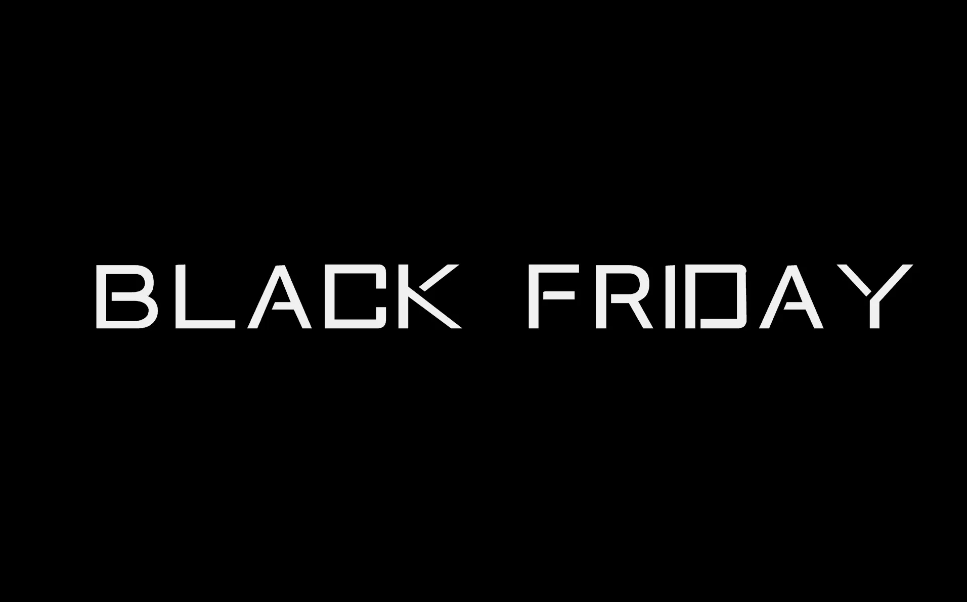

### Import Libraries

## About Dataset

### Dataset History

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Tasks to perform

* Purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.
* Masked in the column description means already converted from categorical value to numerical column.
* Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

### Data Preprocessing

* Check basic statistics of dataset
* Check for missing values in the data
* Check for unique values in data
* Perform EDA
* Purchase Distribution
* Check for outliers
* Analysis by occupation vs purchase , purchase by city, purchase by age group, etc
* Delete unneccesary columns
* Lower all column names
* Fill nan values

### Data Visualisation

* Visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Productcategory1 vs Purchased
* Check for more possible plots

___

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

### Read file

In [2]:
df_ = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df = df_.copy()

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Check basic statistics of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### Check for missing values in the data

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Check for unique values in data

In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### Perform EDA

### Catch numeric, categoric and cardinal variables

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtype) in ['category', 'object', 'bool'] and dataframe[col].nunique() < cat_th]
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtype) in ['int64', 'float64'] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtype) in ['category', 'object'] and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ['float64', 'int64']]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical Variables: {len(cat_cols)}')
    print(f'Numerical Variables: {len(num_cols)}')
    print(f'Numerical But Categorical Variables: {len(num_but_cat)}')
    print(f'Categorical But Cardinal: {len(cat_but_car)}')
    
    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=22, car_th=23)

Observations: 550068
Variables: 12
Categorical Variables: 9
Numerical Variables: 2
Numerical But Categorical Variables: 5
Categorical But Cardinal: 1


**Categorical columns**

In [10]:
cat_cols

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

**Numeric columns**

In [11]:
num_cols.remove('User_ID')

In [12]:
num_cols

['Purchase']

**Cardinal columns**

In [13]:
cat_but_car.append('User ID')

In [14]:
cat_but_car

['Product_ID', 'User ID']

### Summarize the categorical variables

In [15]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': round(100*(dataframe[col_name].value_counts()) / len(dataframe), 2)}))
    
    if plot:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col_name, data=dataframe)
        plt.show()
        
    print('######################################################################\n')

   Gender  Ratio
M  414259  75.31
F  135809  24.69


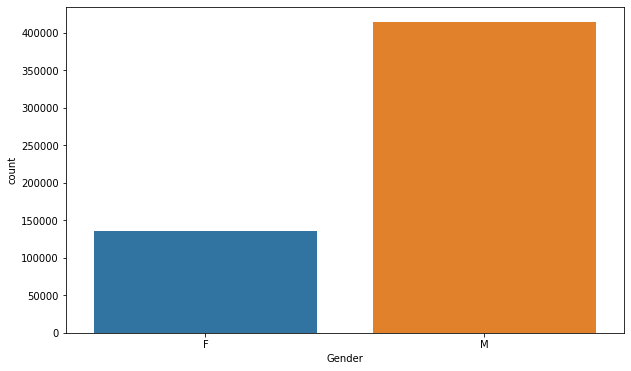

######################################################################

          Age  Ratio
26-35  219587  39.92
36-45  110013  20.00
18-25   99660  18.12
46-50   45701   8.31
51-55   38501   7.00
55+     21504   3.91
0-17    15102   2.75


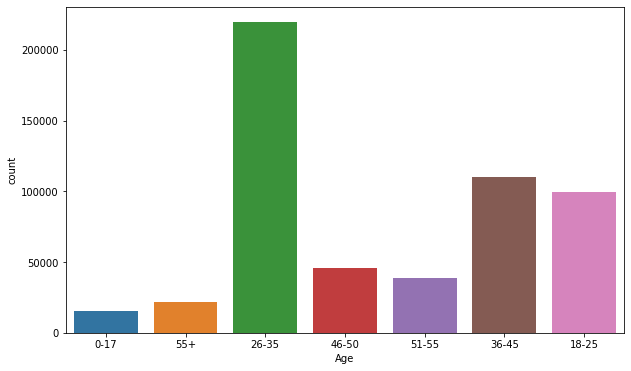

######################################################################

   City_Category  Ratio
B         231173  42.03
C         171175  31.12
A         147720  26.85


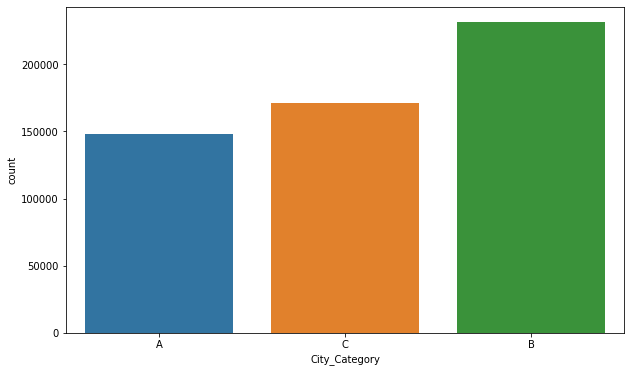

######################################################################

    Stay_In_Current_City_Years  Ratio
1                       193821  35.24
2                       101838  18.51
3                        95285  17.32
4+                       84726  15.40
0                        74398  13.53


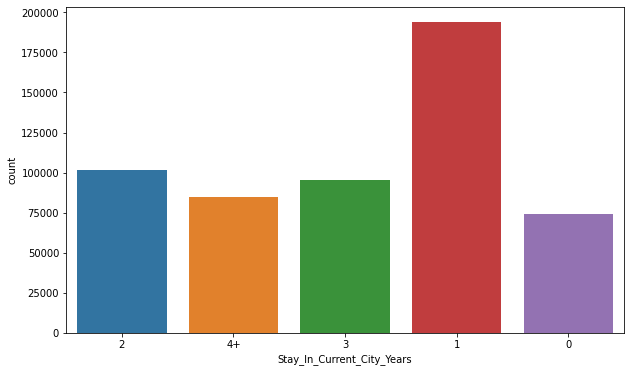

######################################################################

    Occupation  Ratio
4        72308  13.15
0        69638  12.66
7        59133  10.75
1        47426   8.62
17       40043   7.28
20       33562   6.10
12       31179   5.67
14       27309   4.96
2        26588   4.83
16       25371   4.61
6        20355   3.70
3        17650   3.21
10       12930   2.35
5        12177   2.21
15       12165   2.21
11       11586   2.11
19        8461   1.54
13        7728   1.40
18        6622   1.20
9         6291   1.14
8         1546   0.28


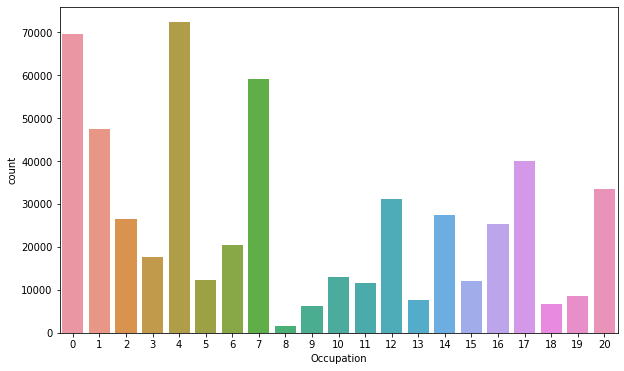

######################################################################

   Marital_Status  Ratio
0          324731  59.03
1          225337  40.97


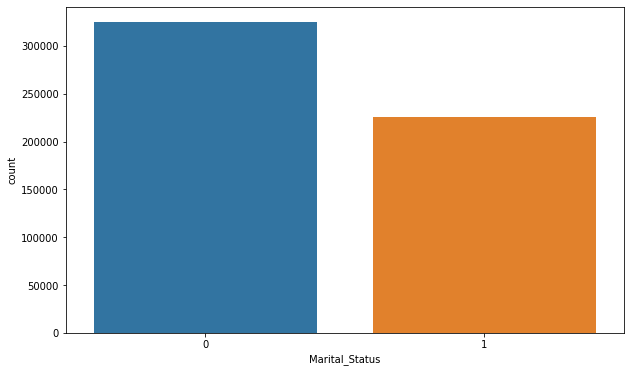

######################################################################

    Product_Category_1  Ratio
5               150933  27.44
1               140378  25.52
8               113925  20.71
11               24287   4.42
2                23864   4.34
6                20466   3.72
3                20213   3.67
4                11753   2.14
16                9828   1.79
15                6290   1.14
13                5549   1.01
10                5125   0.93
12                3947   0.72
7                 3721   0.68
18                3125   0.57
20                2550   0.46
19                1603   0.29
14                1523   0.28
17                 578   0.11
9                  410   0.07


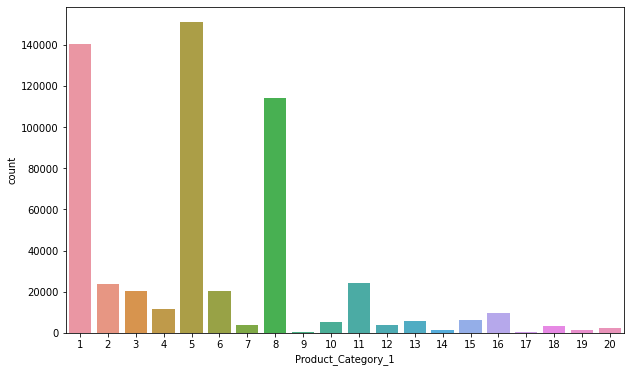

######################################################################

      Product_Category_2  Ratio
8.0                64088  11.65
14.0               55108  10.02
2.0                49217   8.95
16.0               43255   7.86
15.0               37855   6.88
5.0                26235   4.77
4.0                25677   4.67
6.0                16466   2.99
11.0               14134   2.57
17.0               13320   2.42
13.0               10531   1.91
9.0                 5693   1.03
12.0                5528   1.00
10.0                3043   0.55
3.0                 2884   0.52
18.0                2770   0.50
7.0                  626   0.11


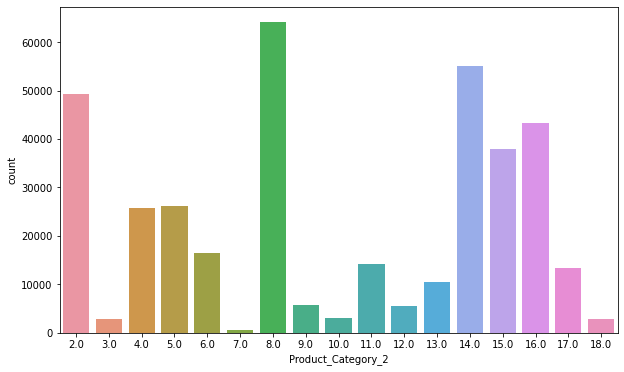

######################################################################

      Product_Category_3  Ratio
16.0               32636   5.93
15.0               28013   5.09
14.0               18428   3.35
17.0               16702   3.04
5.0                16658   3.03
8.0                12562   2.28
9.0                11579   2.11
12.0                9246   1.68
13.0                5459   0.99
6.0                 4890   0.89
18.0                4629   0.84
4.0                 1875   0.34
11.0                1805   0.33
10.0                1726   0.31
3.0                  613   0.11


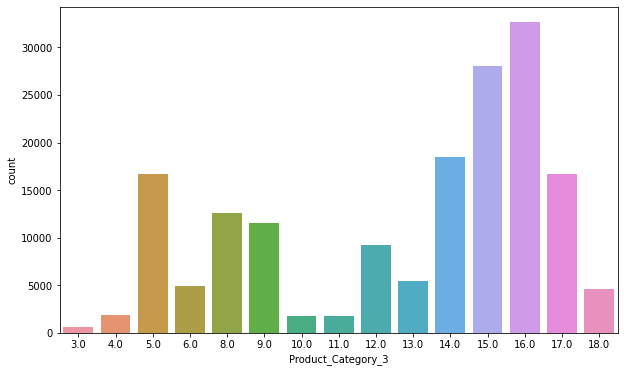

######################################################################



In [16]:
for col_name in cat_cols:
    cat_summary(df, col_name, plot=True)

### Summarize the nemeric variables

In [17]:
def num_summary(dataframe, numerical_col, plot=False):
    print(numerical_col.upper())
    quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        plt.figure(figsize=(10, 6))
        dataframe[numerical_col].hist()
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show()

PURCHASE
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
10%        3540.000000
20%        5266.000000
30%        6136.000000
40%        7150.000000
50%        8047.000000
60%        8900.000000
70%       11528.000000
80%       15165.000000
90%       16317.000000
max       23961.000000
Name: Purchase, dtype: float64


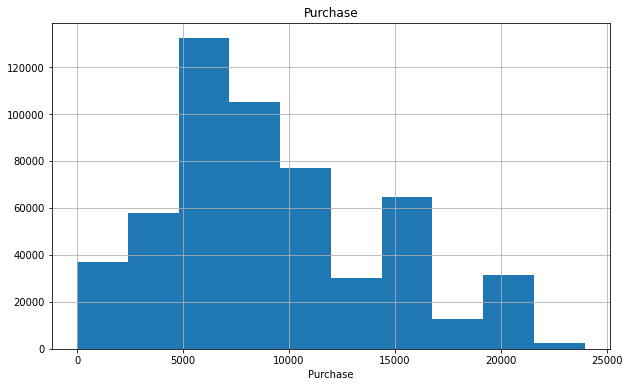

In [18]:
for col_name in num_cols:
    num_summary(df, col_name, plot=True)

### Correlation

<AxesSubplot:>

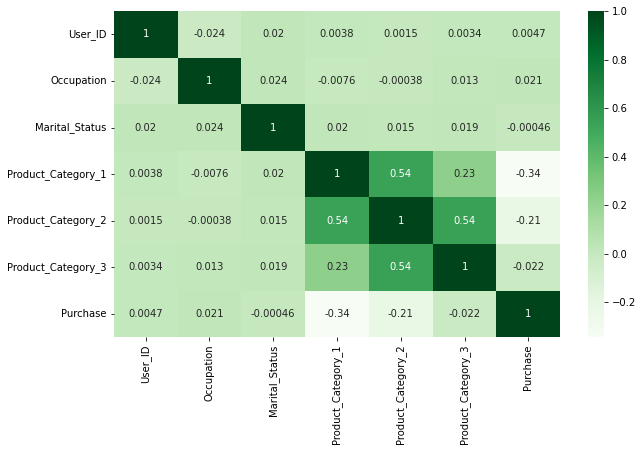

In [19]:
plt.figure(plt.figure(figsize=(10, 6)))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

### Check for outliers

In [20]:
df[['Purchase']].describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [21]:
def outlier_threshold(dataframe, variable):
    
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile
    low_limit = quartile1 - 1.5*interquantile
    
    return low_limit, up_limit

In [22]:
low_limit, up_limit = outlier_threshold(df, 'Purchase')
print(f'Low limit: {low_limit}')
print(f'Up limit: {up_limit}')

Low limit: -3523.5
Up limit: 21400.5


<AxesSubplot:xlabel='Purchase'>

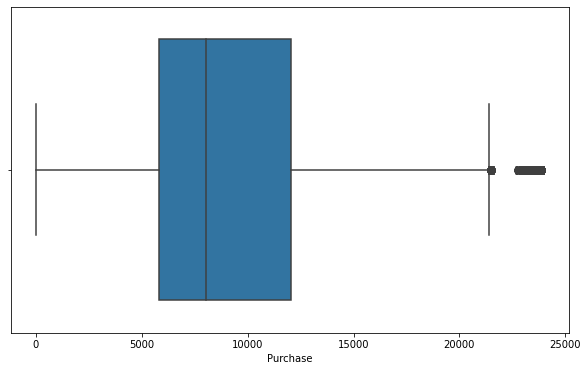

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Purchase')

In [24]:
df.loc[df['Purchase'] > up_limit]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,16.0,NaN,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,13.0,NaN,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,14.0,16.0,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,15.0,16.0,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,15.0,NaN,23341
...,...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,13.0,16.0,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,13.0,NaN,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,16.0,NaN,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,13.0,16.0,23663


### Analysis by occupation vs purchase , purchase by city, purchase by age group, etc

In [25]:
analyze_columns = ['Occupation', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']

           Purchase                                
              count        sum         mean  median
Occupation                                         
0             69638  635406958  9124.428588  8001.0
1             47426  424614144  8953.193270  7966.0
2             26588  238028583  8952.481683  7952.0
3             17650  162002168  9178.593088  8008.0
4             72308  666244484  9213.980251  8043.0
5             12177  113649759  9333.149298  8080.0
6             20355  188416784  9256.535691  8050.0
7             59133  557371587  9425.728223  8069.0
8              1546   14737388  9532.592497  8419.5
9              6291   54340046  8637.743761  7886.0
10            12930  115844465  8959.355375  8012.5
11            11586  106751618  9213.845848  8041.5
12            31179  305449446  9796.640239  8569.0
13             7728   71919481  9306.351061  8090.5
14            27309  259454692  9500.702772  8122.0
15            12165  118960211  9778.891163  8513.0
16          

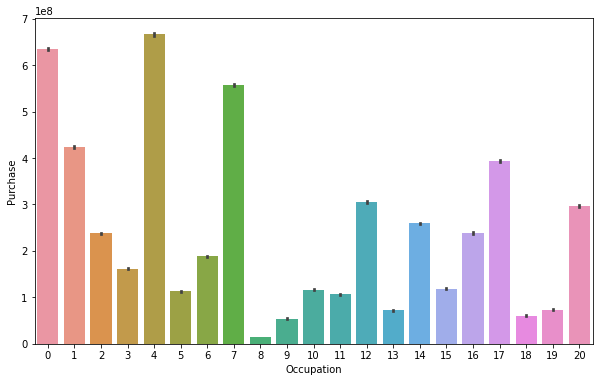


########################################################################################################

       Purchase                                 
          count         sum         mean  median
Gender                                          
F        135809  1186232642  8734.565765  7914.0
M        414259  3909580100  9437.526040  8098.0 


AxesSubplot(0.125,0.125;0.775x0.755)


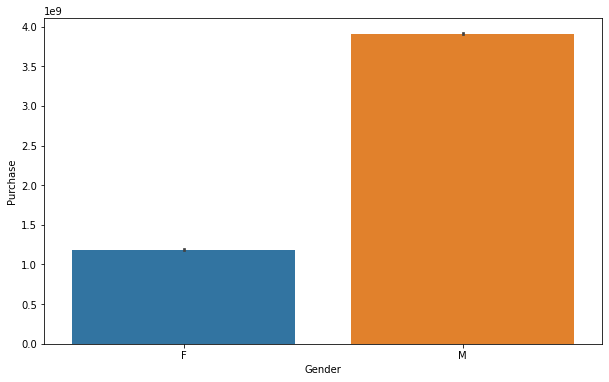


########################################################################################################

      Purchase                                 
         count         sum         mean  median
Age                                            
0-17     15102   134913183  8933.464640  7986.0
18-25    99660   913848675  9169.663606  8027.0
26-35   219587  2031770578  9252.690633  8030.0
36-45   110013  1026569884  9331.350695  8061.0
46-50    45701   420843403  9208.625697  8036.0
51-55    38501   367099644  9534.808031  8130.0
55+      21504   200767375  9336.280459  8105.5 


AxesSubplot(0.125,0.125;0.775x0.755)


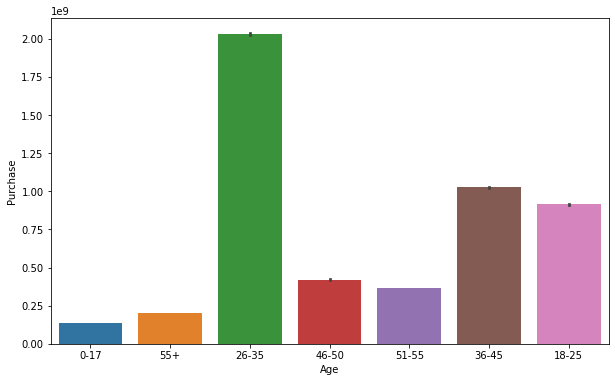


########################################################################################################

              Purchase                                 
                 count         sum         mean  median
City_Category                                          
A               147720  1316471661  8911.939216  7931.0
B               231173  2115533605  9151.300563  8005.0
C               171175  1663807476  9719.920993  8585.0 


AxesSubplot(0.125,0.125;0.775x0.755)


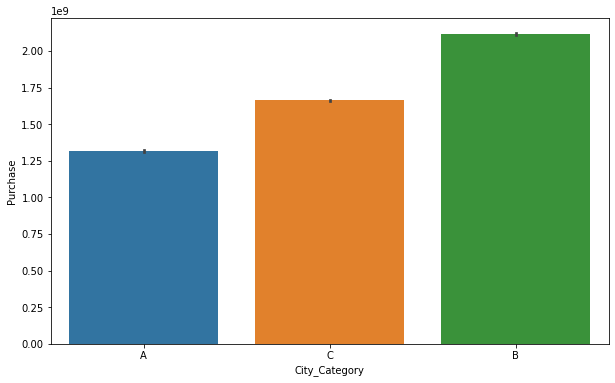


########################################################################################################

                           Purchase                                 
                              count         sum         mean  median
Stay_In_Current_City_Years                                          
0                             74398   682979229  9180.075123  8025.0
1                            193821  1792872533  9250.145923  8041.0
2                            101838   949173931  9320.429810  8072.0
3                             95285   884902659  9286.904119  8047.0
4+                            84726   785884390  9275.598872  8052.0 


AxesSubplot(0.125,0.125;0.775x0.755)


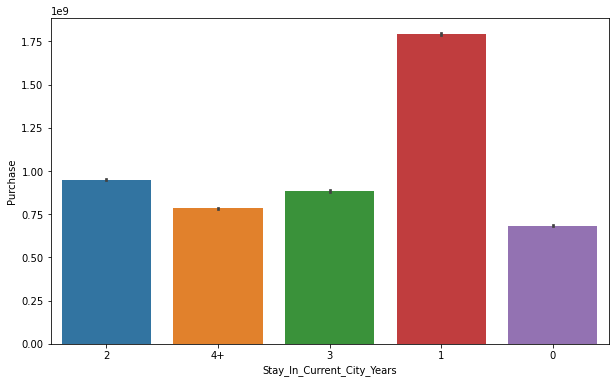


########################################################################################################

               Purchase                                 
                  count         sum         mean  median
Marital_Status                                          
0                324731  3008927447  9265.907619  8044.0
1                225337  2086885295  9261.174574  8051.0 


AxesSubplot(0.125,0.125;0.775x0.755)


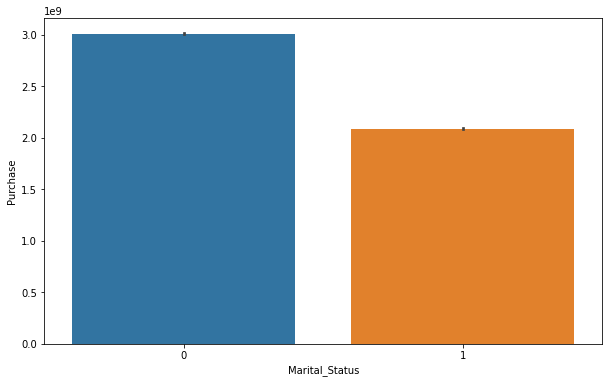


########################################################################################################

                   Purchase                                   
                      count         sum          mean   median
Product_Category_1                                            
1                    140378  1910013754  13606.218596  15245.0
2                     23864   268516186  11251.935384  12728.5
3                     20213   204084713  10096.705734  10742.0
4                     11753    27380488   2329.659491   2175.0
5                    150933   941835229   6240.088178   6912.0
6                     20466   324150302  15838.478550  16312.0
7                      3721    60896731  16365.689600  16700.0
8                    113925   854318799   7498.958078   7905.0
9                       410     6370324  15537.375610  14388.5
10                     5125   100837301  19675.570927  19197.0
11                    24287   113791115   4685.268456   4611.0
12         

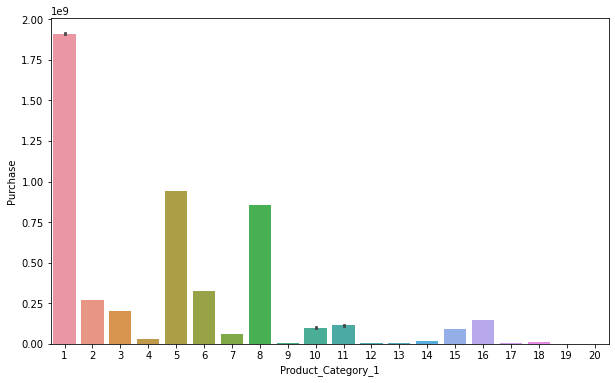


########################################################################################################



In [26]:
for col_name in analyze_columns:
    plt.figure(figsize=(10, 6))
    print(df.groupby(col_name).agg({'Purchase': ['count', 'sum', 'mean', 'median']}), '\n\n')
    print(sns.barplot(x=col_name, y='Purchase', data=df, estimator=sum))
    plt.show()
    print('\n########################################################################################################\n')

___

### Delete unnecesary columns

In [27]:
df.drop('Product_ID', axis=1, inplace=True)

In [28]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Fill nan values

In [29]:
df['Product_Category_3'].fillna(0, inplace=True)

In [30]:
df['Product_Category_2'].fillna(0, inplace=True)

In [31]:
df.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Lower column names

In [32]:
df.columns = [col.lower() for col in df.columns]

In [33]:
df.columns

Index(['user_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')